In [1]:
import os
import ast
import json
import nltk
import string
import gensim
import pickle
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.svm import SVR
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn import preprocessing
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.linear_model import Ridge
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.stats.mstats import winsorize
import sklearn.feature_extraction.text as text
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from nltk.stem import SnowballStemmer,PorterStemmer
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.simplefilter("ignore")
# Download required resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Test Data Preprocessing

### Data Gathering and merge

In [2]:
test_data = pd.read_csv("movies-classification-dataset.csv");

In [3]:
credits = pd.read_csv("movies-credit-students-train.csv");

In [4]:
credits.rename(columns = {'movie_id':'id'}, inplace = True)

In [5]:
test_data = test_data.merge(credits,on='id')

In [6]:
test_data.drop(columns=['id','title_x'],inplace=True)
test_data.rename(columns={'title_y':'title'},inplace=True)
test_data.drop(columns=['overview','homepage','status'],inplace=True)

In [7]:
Y = test_data['Rate']
test_data = test_data.drop(axis=1, columns=['Rate'])

In [8]:
test_data.head()

,budget,genres,keywords,original_language,original_title,viewercount,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_count,title,cast,crew
0,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 4328, ""name"": ""costume""}, {""id"": 4528,...",en,Mao's Last Dancer,1.876811,"[{""name"": ""Great Scott Productions Pty. Ltd."",...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}]",10/1/2009,20719451,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",最后的舞者,28,Mao's Last Dancer,"[{""cast_id"": 2, ""character"": ""Li Cunxin - adul...","[{""credit_id"": ""52fe45419251416c9102c18d"", ""de..."
1,38000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 10988, ""name"": ""based on tv series""}, ...",en,Star Trek: Generations,14.779041,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11/17/1994,120000000,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Boldly go.,452,Star Trek: Generations,"[{""cast_id"": 5, ""character"": ""Captain Jean-Luc...","[{""credit_id"": ""52fe4225c3a36847f8007717"", ""de..."
2,20000000,"[{""id"": 36, ""name"": ""History""}, {""id"": 18, ""na...","[{""id"": 237, ""name"": ""gay""}, {""id"": 582, ""name...",en,Milk,30.909699,"[{""name"": ""Focus Features"", ""id"": 10146}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11/26/2008,54586584,128.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Never Blend In.,612,Milk,"[{""cast_id"": 2, ""character"": ""Harvey Milk"", ""c...","[{""credit_id"": ""52fe43339251416c7500756b"", ""de..."
3,23000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,Vanity Fair,6.618149,"[{""name"": ""Alliance Films"", ""id"": 2514}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",9/1/2004,16123851,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","On September 1st, a heroine will rise.",73,Vanity Fair,"[{""cast_id"": 22, ""character"": ""Becky Sharp"", ""...","[{""credit_id"": ""52fe446c9251416c75034365"", ""de..."
4,52000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 90, ""name"": ""paris""}, {""id"": 591, ""nam...",en,From Paris with Love,27.916284,"[{""name"": ""Apipoula\u00ef"", ""id"": 1076}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2/5/2010,52826594,92.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Two agents. One city. No merci.,675,From Paris with Love,"[{""cast_id"": 3, ""character"": ""Charlie Wax"", ""c...","[{""credit_id"": ""5763f7b792514134cd00026b"", ""de..."


In [9]:
Y.head()

0            High
1    Intermediate
2            High
3    Intermediate
4    Intermediate
Name: Rate, dtype: object

In [10]:
oe = pickle.load(open("ordinal_encoder.pkl", "rb"))
Y = oe.transform(np.array(Y).reshape(-1, 1))

In [11]:
#check the missing values
print(test_data.isnull().sum().to_string())

budget                    0
genres                    0
keywords                  0
original_language         0
original_title            0
viewercount               0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   1
spoken_languages          0
tagline                 383
vote_count                0
title                     0
cast                      0
crew                      0


In [12]:
# Initialize WordNetLemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to remove punctuation and stopwords and apply lemmatization
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize words
    words = nltk.word_tokenize(text)
    # Remove stopwords and apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if not word.lower() in stop_words]
    # Join words into a sentence
    text = " ".join(words)
    return text

# Apply preprocessing on 'original_title' and 'title'
test_data['original_title'] = test_data['original_title'].apply(preprocess_text)
test_data['title'] = test_data['title'].apply(preprocess_text)

In [13]:
test_data['original_title'] = test_data['original_title'].str.lower()
test_data['title'] = test_data['title'].str.lower()
test_data['original_title_not_equal_title'] = test_data['original_title'] != test_data['title']
rows_not_equal = test_data[test_data['original_title_not_equal_title']]
print("The differnet rows between 'title' column and 'original_title' column in train data:")
print(rows_not_equal)

The differnet rows between 'title' column and 'original_title' column in train data:
        budget                                             genres  \
22           0                      [{"id": 18, "name": "Drama"}]   
25           0  [{"id": 53, "name": "Thriller"}, {"id": 80, "n...   
58    70000000  [{"id": 14, "name": "Fantasy"}, {"id": 18, "na...   
71           0  [{"id": 18, "name": "Drama"}, {"id": 36, "name...   
80           0  [{"id": 28, "name": "Action"}, {"id": 36, "nam...   
...        ...                                                ...   
2976   7000000  [{"id": 53, "name": "Thriller"}, {"id": 878, "...   
2987  14000000                      [{"id": 18, "name": "Drama"}]   
3009  15000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   
3025         0  [{"id": 18, "name": "Drama"}, {"id": 36, "name...   
3031   6500000  [{"id": 80, "name": "Crime"}, {"id": 18, "name...   

                                               keywords original_language  \
22       

In [14]:
test_data.drop(columns=['original_title','title','original_title_not_equal_title'],inplace=True)

In [15]:
test_data['tagline'] = test_data['tagline'].astype(str).fillna('')

In [16]:
# get sentiment value from title
# Define a function to get the sentiment score of a movie title using TextBlob
def get_sentiment_score(title):
    text_blob = TextBlob(title)
    return text_blob.sentiment.polarity

# Apply the function to the 'title' column of the DataFrame to get the sentiment scores
test_data['tagline'] = test_data['tagline'].apply(get_sentiment_score)

In [17]:
get_sentiment_score('depressed')

0.0

In [18]:
# date extraction
test_data['day'] = pd.to_datetime(test_data['release_date']).dt.day # drop if it is not needed
test_data['month'] = pd.to_datetime(test_data['release_date']).dt.month
test_data['year'] = pd.to_datetime(test_data['release_date']).dt.year

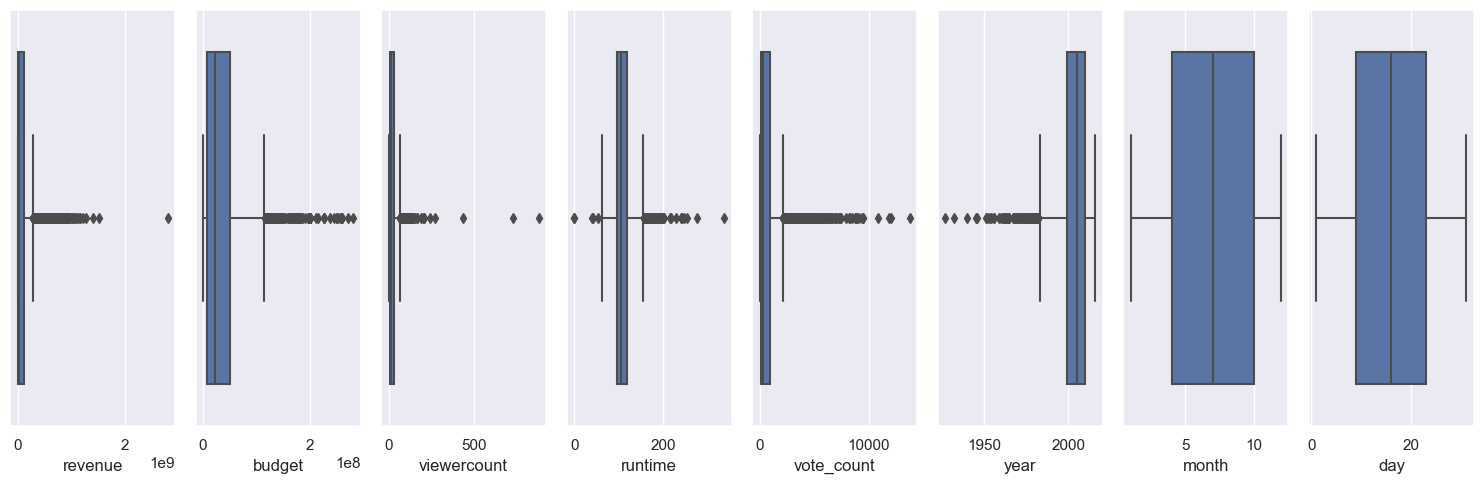

In [19]:
#checking outliers
sns.set()
fig, axs = plt.subplots(1,8, figsize = (15,5))
plt1 = sns.boxplot(test_data['revenue'], ax = axs[0])
plt2 = sns.boxplot(test_data['budget'], ax = axs[1])
plt3 = sns.boxplot(test_data['viewercount'], ax = axs[2])
plt4 = sns.boxplot(test_data['runtime'], ax = axs[3])
plt5 = sns.boxplot(test_data['vote_count'], ax = axs[4])
plt6 = sns.boxplot(test_data['year'], ax = axs[5])
plt7 = sns.boxplot(test_data['month'], ax = axs[6])
plt8 = sns.boxplot(test_data['day'], ax = axs[7])

plt.tight_layout()

In [20]:
def replace_test_outlier(col,limits):
    test_data.loc[test_data[col] > limits[0],col]=limits[0]
    test_data.loc[test_data[col] < limits[1],col]=limits[1]

In [21]:
limit_values = pickle.load(open("limit_values_c.pkl", "rb"))

In [22]:
outliers_column=['revenue','budget','runtime','vote_count','viewercount','year']
i = 0
for col in outliers_column:
    replace_test_outlier(col,limit_values[i])
    i += 1

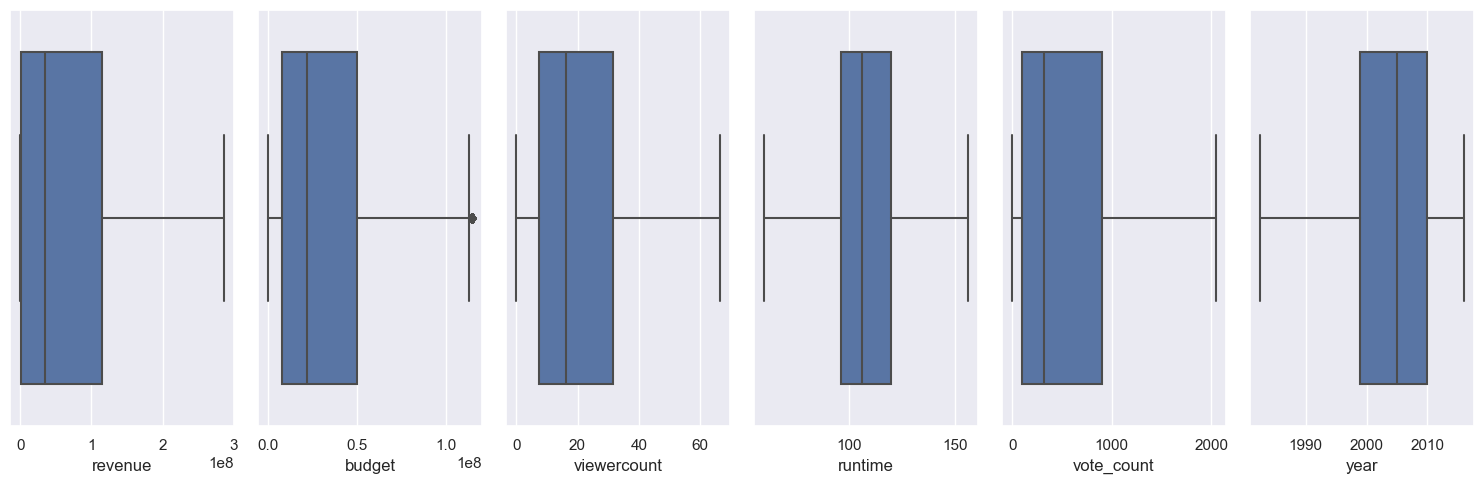

In [23]:
#checking outliers
sns.set()
fig, axs = plt.subplots(1,6, figsize = (15,5))
plt1 = sns.boxplot(test_data['revenue'], ax = axs[0])
plt2 = sns.boxplot(test_data['budget'], ax = axs[1])
plt3 = sns.boxplot(test_data['viewercount'], ax = axs[2])
plt4 = sns.boxplot(test_data['runtime'], ax = axs[3])
plt5 = sns.boxplot(test_data['vote_count'], ax = axs[4])
plt6 = sns.boxplot(test_data['year'], ax = axs[5])
plt.tight_layout()

In [24]:
date_mode = pickle.load(open("date_mode_c.pkl", "rb"))
runtime_mean = pickle.load(open("runtime_mean_c.pkl", "rb"))
vote_count_med = pickle.load(open("vote_count_med_c.pkl", "rb"))
viewer_count_med = pickle.load(open("viewer_count_med_c.pkl", "rb"))
revnue_med = pickle.load(open("revnue_med_c.pkl", "rb"))
OL_mode = pickle.load(open("OL_mode_c.pkl", "rb"))
budget_mean = pickle.load(open("budget_mean_c.pkl", "rb"))
saved_fitted_data = pickle.load(open("saved_fitted_data_c.pkl", "rb"))
filterd_Col = pickle.load(open("filterd_Cols.pkl", "rb"))

In [25]:
test_data['release_date'].fillna(value=date_mode, inplace=True)
test_data['release_date'].replace(0, date_mode, inplace=True)

In [26]:
test_data['runtime'].replace(0,runtime_mean,inplace=True)
test_data['runtime'].fillna(value=runtime_mean, inplace=True)

In [27]:
test_data['vote_count'].fillna(value=vote_count_med, inplace=True)
test_data['vote_count'].replace(0, vote_count_med, inplace=True)

In [28]:
test_data['viewercount'].fillna(value=viewer_count_med, inplace=True)
test_data['viewercount'].replace(0, viewer_count_med, inplace=True)

In [29]:
test_data['revenue'].fillna(value=revnue_med, inplace=True)
test_data['revenue'].replace(0, revnue_med, inplace=True)

In [30]:
test_data['budget'].dtype

dtype('int64')

In [31]:
test_data['original_language'] = test_data['original_language'].apply(lambda x: OL_mode if str(x).isdigit() else x)

In [32]:
test_data.head()

,budget,genres,keywords,original_language,viewercount,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_count,cast,crew,day,month,year
0,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 4328, ""name"": ""costume""}, {""id"": 4528,...",en,1.876811,"[{""name"": ""Great Scott Productions Pty. Ltd."",...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}]",10/1/2009,20719451.0,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",0.000000,28,"[{""cast_id"": 2, ""character"": ""Li Cunxin - adul...","[{""credit_id"": ""52fe45419251416c9102c18d"", ""de...",1,10,2009.0
1,38000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 10988, ""name"": ""based on tv series""}, ...",en,14.779041,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11/17/1994,120000000.0,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0.333333,452,"[{""cast_id"": 5, ""character"": ""Captain Jean-Luc...","[{""credit_id"": ""52fe4225c3a36847f8007717"", ""de...",17,11,1994.0
2,20000000,"[{""id"": 36, ""name"": ""History""}, {""id"": 18, ""na...","[{""id"": 237, ""name"": ""gay""}, {""id"": 582, ""name...",en,30.909699,"[{""name"": ""Focus Features"", ""id"": 10146}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11/26/2008,54586584.0,128.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",0.000000,612,"[{""cast_id"": 2, ""character"": ""Harvey Milk"", ""c...","[{""credit_id"": ""52fe43339251416c7500756b"", ""de...",26,11,2008.0
3,23000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,6.618149,"[{""name"": ""Alliance Films"", ""id"": 2514}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",9/1/2004,16123851.0,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",0.000000,73,"[{""cast_id"": 22, ""character"": ""Becky Sharp"", ""...","[{""credit_id"": ""52fe446c9251416c75034365"", ""de...",1,9,2004.0
4,52000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 90, ""name"": ""paris""}, {""id"": 591, ""nam...",en,27.916284,"[{""name"": ""Apipoula\u00ef"", ""id"": 1076}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2/5/2010,52826594.0,92.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",0.000000,675,"[{""cast_id"": 3, ""character"": ""Charlie Wax"", ""c...","[{""credit_id"": ""5763f7b792514134cd00026b"", ""de...",5,2,2010.0


In [33]:
test_data['budget'].fillna(value=budget_mean, inplace=True)
test_data['budget'].replace(0, budget_mean, inplace=True)

In [34]:
from sklearn.preprocessing import LabelEncoder
# Load the encoder from the file
with open('encoder_c.pkl', 'rb') as f:
    encoder = pickle.load(f)

# Use the loaded encoder to transform the test set
test_data['original_language'] = encoder.transform(test_data[['original_language']])

In [35]:
json_cols = ['genres', 'keywords', 'production_companies', 'spoken_languages', 'production_countries','cast','crew']

def extract_keywords(x):
    L=[]
    for i in ast.literal_eval(x):
            L.append(i['name'])
    return L
for col in json_cols:
    test_data[col]=test_data[col].apply(extract_keywords)


In [36]:
test_data.head()

,budget,genres,keywords,original_language,viewercount,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_count,cast,crew,day,month,year
0,25000000.0,"[Drama, Romance]","[costume, song, village, promise, ballet]",4.0,1.876811,[Great Scott Productions Pty. Ltd.],[Australia],10/1/2009,20719451.0,117.0,"[English, 普通话]",0.000000,28,"[Chi Cao, Chengwu Guo, Wen Bin Huang, Joan Che...",[Bruce Beresford],1,10,2009.0
1,38000000.0,"[Science Fiction, Action, Adventure, Thriller]","[based on tv series, death, exploding planet, ...",4.0,14.779041,[Paramount Pictures],[United States of America],11/17/1994,120000000.0,118.0,[English],0.333333,452,"[Patrick Stewart, Jonathan Frakes, Brent Spine...","[John M. Dwyer, John A. Alonzo, Peter E. Berge...",17,11,1994.0
2,20000000.0,"[History, Drama]","[gay, san francisco, homophobia, mayor, biogra...",4.0,30.909699,[Focus Features],[United States of America],11/26/2008,54586584.0,128.0,[English],0.000000,612,"[Sean Penn, Emile Hirsch, James Franco, Josh B...","[Bruce Cohen, Gus Van Sant, Gus Van Sant, Harr...",26,11,2008.0
3,23000000.0,"[Drama, Romance]","[london england, british empire, lover, advanc...",4.0,6.618149,"[Alliance Films, Focus Features]","[United Kingdom, United States of America]",9/1/2004,16123851.0,141.0,"[English, Français, Deutsch]",0.000000,73,"[Reese Witherspoon, James Purefoy, Jonathan Rh...","[Mychael Danna, Declan Quinn, Pippa Cross, Mir...",1,9,2004.0
4,52000000.0,"[Action, Crime, Thriller]","[paris, cia, undercover, explosive, pimp, amba...",4.0,27.916284,"[Apipoulaï, M6 Films, Canal+, TPS Star, Grive ...","[United Kingdom, France]",2/5/2010,52826594.0,92.0,"[Deutsch, English, Français, 普通话]",0.000000,675,"[John Travolta, Jonathan Rhys Meyers, Kasia Sm...","[Luc Besson, Jacques Bufnoir, Philippe Hubin, ...",5,2,2010.0


In [37]:
class Our_OneHotEncoder:
    data = set()
    
    def __init__(self):
        self.data.clear()
    
    def fit_freq(self, freq_set):
        # adding items to data field
        self.data = freq_set
    
    def fit(self, df, column_name):
        # adding items to data field
        for lst in df[column_name]:
            for element in lst:
                self.data.add(element)

    def transform(self, df, column_name):
        data_lst = list(self.data)
        
        #Initializing the one-hot columns
        for col in data_lst:
            df[col] = np.zeros(df.shape[0], dtype=int)
        
        # One-Hot Encoding
        for i, row in df.iterrows():
            for element in row[column_name]:
                if element in data_lst:
                    df.loc[i, element] = 1
        df.drop(columns=[column_name],inplace=True)    


In [38]:
oneHotColumns=['genres', 'production_companies','production_countries','cast']
i = 0
for col in oneHotColumns:
    encoder = Our_OneHotEncoder()
    encoder.data = set(saved_fitted_data[i])
    encoder.transform(test_data,col)
    i+=1

In [39]:
word2vectorColumns=['keywords','crew', 'spoken_languages']
def word2vectorFunction(data,col):
    model1 = gensim.models.Word2Vec(data[col], min_count = 1)
    X = []
    for keyword in data[col]:
        feature_vec = np.zeros((100,))
        for word in keyword:
            if word in model1.wv.key_to_index:
                feature_vec += model1.wv[word]
        X.append(feature_vec)
    data[col] = X
for col in word2vectorColumns:
    word2vectorFunction(test_data,col)

In [40]:
import statistics
from statistics import mean
columns = ['keywords', 'crew', 'spoken_languages']   

def calculate_mean(df, col):
    for i, row in df.iterrows():
        df.loc[i, col] = mean(df.loc[i, col])
        
for col in columns:
    calculate_mean(test_data, col)

In [41]:
cols=['budget','viewercount','revenue','runtime','vote_count','year','month','day', 'keywords','crew', 'spoken_languages']
with open('scaler_c.pkl', 'rb') as f:
    scaler = pickle.load(f)
test_data[cols]=scaler.transform(test_data[cols])

In [42]:
test_data = test_data[filterd_Col]

In [43]:
DT = pickle.load(open("DT.pkl", "rb"))
svc = pickle.load(open("svm_c.pkl", "rb"))
logistic = pickle.load(open("lr_c.pkl", "rb"))
KNN = pickle.load(open("KNN.pkl", "rb"))
Linear_Discriminant_model = pickle.load(open("Linear_Discriminant_model.pkl", "rb"))
random_forest_model = pickle.load(open("random_forest_model.pkl", "rb"))
Gradient_Boosting_model = pickle.load(open("Gradient_Boosting_model.pkl", "rb"))
ensemble = pickle.load(open("ensemble.pkl", "rb"))

In [44]:
def model_prediction(model):
    y_pred = model.predict(test_data)
    # Evaluating the model performance
    accuracy = accuracy_score(Y, y_pred)
    print("Accuracy:", accuracy)
    r2 = r2_score(y_test, y_pred)
    print('R^2 score = ',r2)

In [45]:
def predictWithMatrix(model):
    y_pred = model.predict(test_data)
    # Evaluating the model performance
    accuracy = accuracy_score(Y, y_pred)
    print("Accuracy:", accuracy)
    cm = confusion_matrix(Y, y_pred)
    # Create the heatmap using seaborn
    sns.heatmap(cm, annot=True, cmap='Blues')

In [46]:
model_prediction(DT)

Accuracy: 0.7161226508407518


In [47]:
model_prediction(svc)

Accuracy: 0.6904055390702275


Accuracy: 0.6712825585229146


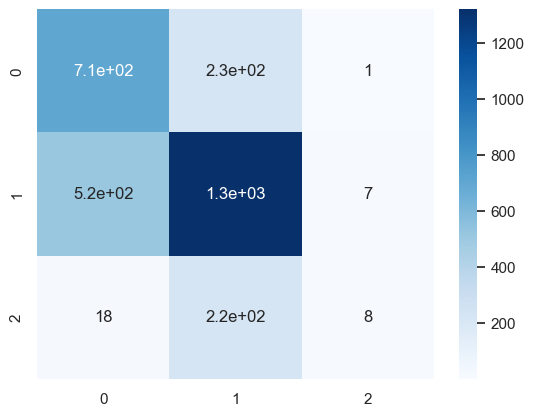

In [48]:
predictWithMatrix(logistic)

In [49]:
model_prediction(KNN)

Accuracy: 0.7200791295746786


In [50]:
model_prediction(Linear_Discriminant_model)

Accuracy: 0.6505110451697989


In [51]:
model_prediction(random_forest_model)

Accuracy: 0.7246950214309265


In [52]:
model_prediction(Gradient_Boosting_model)

Accuracy: 0.739531816683152


In [53]:
model_prediction(ensemble)

Accuracy: 0.705242334322453
